<a href="https://colab.research.google.com/github/azfar154/Heart-Disease-Visualization-and-Classification/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease**

You may find the dataset that I used [here](https://www.kaggle.com/ronitf/heart-disease-uci) 

# Credits

Creators:

1.   Hungarian Institute of Cardiology. Budapest: Andras Janosi, MD.
2.   University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3.   V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


Donor:

1.  David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

# **Setup**

---



In [0]:
# import necessary libraries
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
from numpy import arange


warnings.simplefilter('ignore')

In [454]:
#. import the data and view a preview
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Data Visualization**

---



We will assume that the data is not heuristic. The data came from a credible source. (UCI)

Plot of mean features of each target

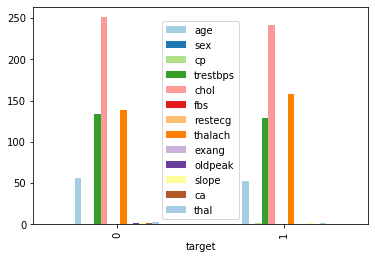

In [455]:
#. group by target and get the mean of each feature
tar = data.groupby('target')
tar.agg('mean').plot(kind='bar')

Changing the color pallete for the below plot

In [0]:
ui = ['#47476b','#ff0000']
sns.set_palette(ui)

We have around a equal split of both of the classes.



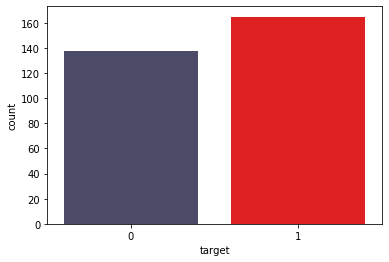

In [457]:
sns.countplot(data['target'])
plt.show()

Change the color pallete to help color blind people see the graphs

In [0]:
sns.set_palette(sns.color_palette("Paired"))

In [0]:
#. get the confirmed cases
cases = data.query('target == 1')

Do males have a higher chance of having heart disease?

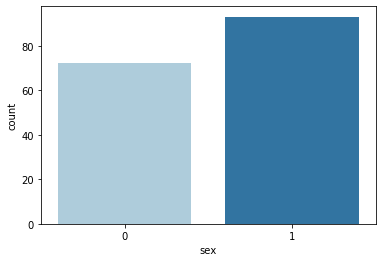

In [451]:
sns.countplot(cases['sex'])

Exang(exercise induced angina) is common in heart disease patients

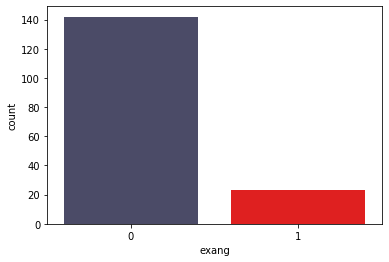

In [531]:
sns.countplot(cases['exang'])

How do resting electrocardiographic results affect heart disease?

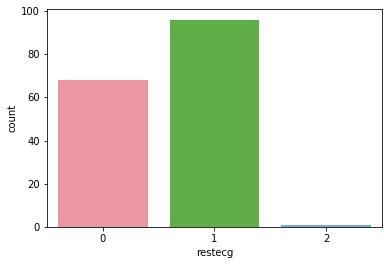

In [532]:
sns.countplot(cases['restecg'])

A decent µ is approximately 53 and σ is approximately 9.5







In [438]:
np.mean(cases['age'])

52.4969696969697

In [439]:
np.std(cases['age'])

9.521665402091422

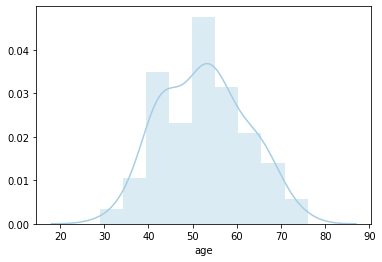

In [436]:
sns.distplot(cases['age'])
plt.show()

Define the dependent and independent features

In [0]:
X = data.drop(columns=['target'])
Y = data['target']

Plot of the features

<Figure size 3240x3240 with 0 Axes>

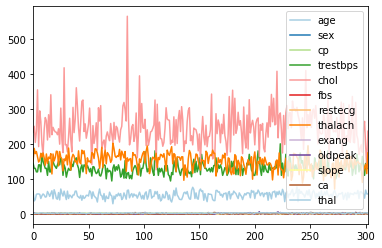

In [426]:
plt.figure(figsize=(45,45))
X.plot()
plt.show()

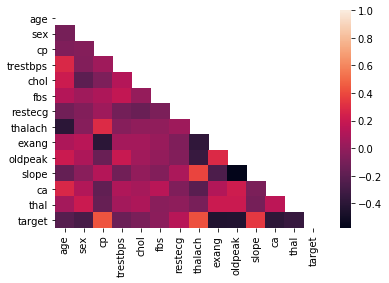

In [427]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask)
plt.show()

# **Get Important Features and Define Functions**

---



In [0]:
def find_optimal_params(model,params):
  """
  Get Optimal Parameters for a model

  :param Model: Machine Learning model
  :param Params: Altering params and ranges 

  :return: a json of params and their optimal value 

  """
  grid = GridSearchCV(model,param_grid=params)
  grid.fit(X_train,y_train)
  return grid.best_params_

Finding features that affect heart disease mostly

In [242]:
features = SelectKBest(chi2,k=7)
features.fit(X,Y)
X.columns[features.get_support()]

Index(['age', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')

In [0]:
#.  keep track of the information
models = []
scores = []

In [0]:
X_train,x_test,y_train,y_test = train_test_split(X,Y)

#**Logistic Regression**
---



In [516]:
print("Finding the optimal params for the C param for the Logistic Regression model ")
#. find the optimal param with a predefined function
optimal_param = find_optimal_params(LogisticRegression(),{'C':range(0,110,5)})['C']
print("\nOptimal Param for C =",optimal_param)

Finding the optimal params for the C param for the Logistic Regression model 

Optimal Param for C = 20



		Logistic Regression Model

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        35
           1       0.82      0.98      0.89        41

    accuracy                           0.87        76
   macro avg       0.89      0.86      0.86        76
weighted avg       0.88      0.87      0.87        76



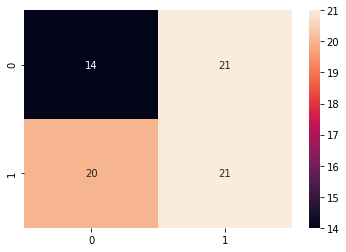

In [517]:
print("\n\t\tLogistic Regression Model\n")
#. make the LogisticRegression model
model = LogisticRegression(C = 20).fit(X_train,y_train)
#.  get the test score and append it to scores list
test_score = model.score(x_test,y_test)
scores.append(test_score)
test_predicted = model.predict(x_test)
print(classification_report(y_test,test_predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()

In [518]:
print("Cross Validation Score\n")
np.average(cross_val_score(LogisticRegression(C = 45),X,Y))

Cross Validation Score



0.834808743169399

# **Support Vector Machine**


---



In [519]:
 print("Finding the optimal params for the C param for the SVC model ")
 #. find the optimal param with a predefined function
optimal_param = find_optimal_params(SVC(kernel='rbf'),{'C':range(0,110,5)})['C']
print("\nOptimal Param for C =",optimal_param)

Finding the optimal params for the C param for the SVC model 

Optimal Param for C = 100



		SVC Model with Radial Basis Kernel

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.75      0.88      0.81        41

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



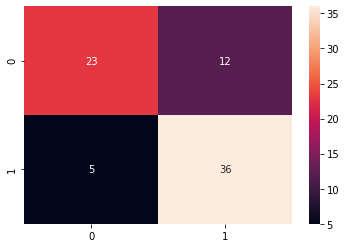

In [520]:
print("\n\t\tSVC Model with Radial Basis Kernel\n")
model = SVC(C = 90,kernel='rbf').fit(X_train,y_train)
test_score = model.score(x_test,y_test)
scores.append(test_score)
predicted = model.predict(x_test)
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()

In [521]:
print("Cross Validation Score\n")
np.average(cross_val_score(SVC(C = 90),X,Y))

Cross Validation Score



0.7324590163934426

# **Random Forest Classifier**


---



In [522]:
print("Finding the optimal params for the n_estimators param for the RandomForestClassifier model ")
optimal_param = find_optimal_params(RandomForestClassifier(),{'n_estimators':range(0,20,5)})['n_estimators']
print("\nOptimal Param for n_estimators =",optimal_param)

Finding the optimal params for the n_estimators param for the RandomForestClassifier model 

Optimal Param for n_estimators = 15



		RandomForestClassifier with Radial Basis Kernel

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



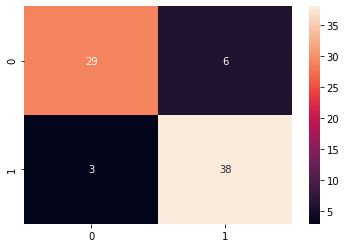

In [523]:
print("\n\t\tRandomForestClassifier with Radial Basis Kernel\n")

model = RandomForestClassifier(n_estimators=15).fit(X_train,y_train)
scores.append(model.score(x_test,y_test))
predicted = model.predict(x_test)
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()

In [524]:
print("Cross Validation Score\n")
np.average(cross_val_score(RandomForestClassifier(n_estimators=15),X,Y))

Cross Validation Score



0.7885792349726776

# **Adaboost Classifier**


---





In [525]:
print("Finding the optimal params for the learningrate and n_estimaters param for the AdaboostClassifier model ")
optimal_param = find_optimal_params(AdaBoostClassifier(),{'learning_rate':arange(0.01,1,0.01),'n_estimators':range(1,5,50)})
print("\nOptimal Param for n_estimators =",optimal_param)

Finding the optimal params for the learningrate and n_estimaters param for the AdaboostClassifier model 

Optimal Param for n_estimators = {'learning_rate': 0.01, 'n_estimators': 1}



		Adaboost Classifier

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



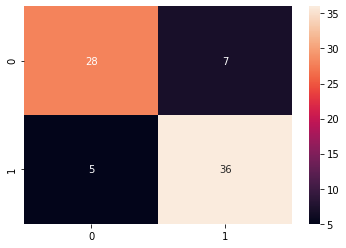

In [526]:
print("\n\t\tAdaboost Classifier\n")

model = AdaBoostClassifier(learning_rate=0.01,n_estimators=1).fit(X_train,y_train)
scores.append(model.score(x_test,y_test))
predicted = model.predict(x_test)
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()

In [527]:
print("Cross Validation Score\n")
np.average(cross_val_score(AdaBoostClassifier(learning_rate=0.01,n_estimators=1),X,Y))

Cross Validation Score



0.7357377049180328

# **Conclusion and AfterMarks**


---



In [0]:
classifiers = ['Logistic Regression','Support Vector Machine','Random Forest Classifier','Adaboost Classifier']

In [529]:
data = pd.DataFrame({'Classifiers':classifiers,'Scores':scores})
data.head()

,Classifiers,Scores
0,Logistic Regression,0.868421
1,Support Vector Machine,0.776316
2,Random Forest Classifier,0.881579
3,Adaboost Classifier,0.842105


In [530]:
px.bar(data,x="Classifiers",y='Scores',title="Test Scores")